In [1]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
import os

In [2]:
old_path = "Raw DB/household/energy/daily_dataset/"
new_path = "Raw DB/household/energy/"

In [3]:
# Combining all blocks
old_path = "Raw DB/household/energy/daily_dataset/"
new_path = "Raw DB/household/energy/"
for num in range(0,112):
    df = pd.read_csv(old_path + "block_"+str(num)+".csv")
    df = df[["day","LCLid","energy_sum"]]
    df.reset_index()
    df.to_csv(new_path + "hc_"+str(num)+".csv")

In [4]:
fout= open(new_path + "energy.csv","a")
# first file:
for line in open(new_path + "hc_0.csv"):
    fout.write(line)
# now the rest:    
for num in range(0,112):
    f = open(new_path + "hc_"+str(num)+".csv")
    f.readline() # skip the header
    for line in f:
         fout.write(line)
    f.close()
fout.close()

In [5]:
df = pd.read_csv(new_path + "energy.csv")
df.head()

,Unnamed: 0,day,LCLid,energy_sum
0,0,2012-10-12,MAC000002,7.098
1,1,2012-10-13,MAC000002,11.087
2,2,2012-10-14,MAC000002,13.223
3,3,2012-10-15,MAC000002,10.257
4,4,2012-10-16,MAC000002,9.769


In [8]:
df.columns

Index(['Unnamed: 0', 'day', 'LCLid', 'energy_sum'], dtype='object')

In [7]:
housecount = df.groupby("day")[["LCLid"]].nunique()
print(len(housecount))
housecount.head(4)

829


,LCLid
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41


In [9]:
#rename columns
housecount = housecount.rename({"LCLid":"Count"},axis=1)

<AxesSubplot:title={'center':'Number of houses'}, xlabel='day'>

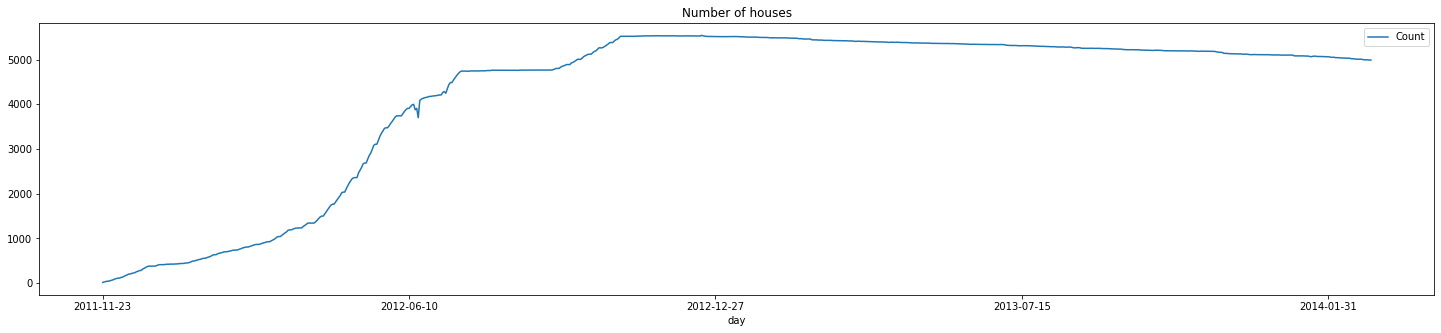

In [10]:
housecount.plot(figsize=(25,5),title = "Number of houses")

In [11]:
#energy per household
df = df.groupby("day")[["energy_sum"]].sum()
df = df.merge(housecount, on = ["day"])
df = df.reset_index()

In [12]:
df.count()

day           829
energy_sum    829
Count         829
dtype: int64

In [13]:
df.columns

Index(['day', 'energy_sum', 'Count'], dtype='object')

In [14]:
df.day[0]

'2011-11-23'

In [15]:
df["day"] = pd.to_datetime(df["day"],format="%Y-%m-%d").dt.date

In [13]:
df.head()

,day,energy_sum,Count
0,2011-11-23,271.155,13
1,2011-11-24,640.236,25
2,2011-11-25,911.979,32
3,2011-11-26,1262.93,41
4,2011-11-27,1334.65,41


In [16]:
df["avg_energy"] =  df["energy_sum"]/df["Count"]
print("Starting Point of Data at Day Level",min(df.day))
print("Ending Point of Data at Day Level",max(df.day))

Starting Point of Data at Day Level 2011-11-23
Ending Point of Data at Day Level 2014-02-28


In [17]:
df.describe()

,energy_sum,Count,avg_energy
count,829.000000,829.000000,829.000000
mean,43535.325676,4234.539204,10.491862
std,20550.594031,1789.994799,1.902513
min,90.385000,13.000000,0.211766
25%,34665.436003,4084.000000,8.676955
50%,46641.160997,5138.000000,10.516983
75%,59755.616996,5369.000000,12.000690
max,84156.135002,5541.000000,15.964434


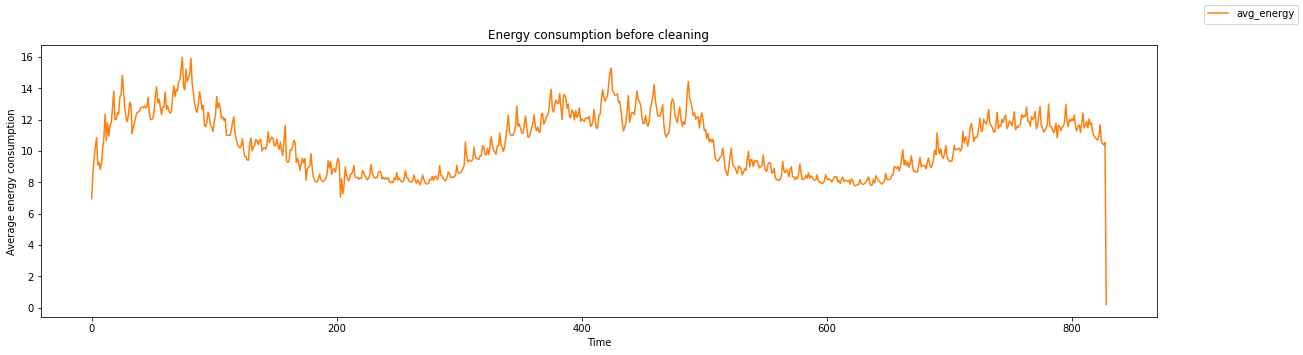

In [18]:
#we can see the error at the min value, it is too small in comparison to the mean value, which indicates that, it is an error
#we plot to see
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(np.arange(len(df.avg_energy)), df.avg_energy, color = "tab:orange", label = "avg_energy")
#ax1.set_ylim([-5,80])
ax1.set_title("Energy consumption before cleaning")
ax1.set_ylabel("Average energy consumption")
ax1.set_xlabel("Time")
fig.legend(loc="upper right")

In [19]:
#delete the last value, it is an error


In [20]:
df = df.drop([df.index[-1]])

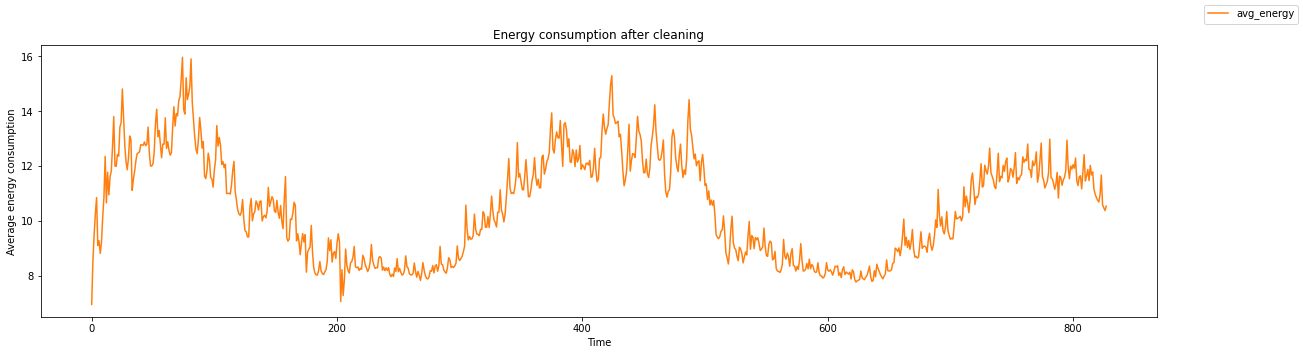

In [22]:
fig, ax1 = plt.subplots(figsize = (20,5))
ax1.plot(np.arange(len(df.avg_energy)), df.avg_energy, color = "tab:orange", label = "avg_energy")
#ax1.set_ylim([-5,80])
ax1.set_title("Energy consumption after cleaning")
ax1.set_ylabel("Average energy consumption")
ax1.set_xlabel("Time")
fig.legend(loc="upper right")

In [23]:
file_path = "Data/household/merged_energy.csv"
#export the clean data
df.to_csv(r"Data/household/merged_energy.csv",index=False)

In [24]:
energy = pd.read_csv(file_path)
energy.head()

,day,energy_sum,Count,avg_energy
0,2011-11-23,90.385000,13,6.952692
1,2011-11-24,213.412000,25,8.536480
2,2011-11-25,303.993000,32,9.499781
3,2011-11-26,420.976000,41,10.267707
4,2011-11-27,444.883001,41,10.850805


In [25]:
energy.describe()

,energy_sum,Count,avg_energy
count,828.000000,828.000000,828.000000
mean,43586.629118,4233.630435,10.504277
std,20509.826578,1790.885327,1.869757
min,90.385000,13.000000,6.952692
25%,34691.764001,4062.500000,8.678033
50%,46647.052997,5138.000000,10.522346
75%,59789.459499,5369.000000,12.000952
max,84156.135002,5541.000000,15.964434


In [26]:
#remove unsed files
#remove energy.csv
os.remove(new_path + "energy.csv")
for num in range(0,112):
    os.remove(new_path + "hc_"+str(num) + ".csv")